In [1]:
import gdown
import pandas as pd

# Define the file URLs
users_url = ""
users_likes_url = ""
likes_url = ""

# Define the output file names
users_file = "users.csv"
user_likes_file = "user_likes.csv"
likes_file = "likes.csv"

# Download the files
gdown.download(users_url, output=users_file, quiet=False)
gdown.download(users_likes_url, output=user_likes_file, quiet=False)
gdown.download(likes_url, output=likes_file, quiet=False)

# Load data into dataframes
users_df = pd.read_csv(users_file)
users_likes_df = pd.read_csv(user_likes_file)
likes_df = pd.read_csv(likes_file)

# Display the first few rows of each dataframe
print("Users Data:")
print(users_df.head())

print("\nUser Likes Data:")
print(users_likes_df.head())

print("\nLikes Data:")
print(likes_df.head())


Downloading...
From: https://drive.google.com/uc?id=1WQtuspHkY65TUZIX6ZW8lzfkhClpdSP2
To: /content/users.csv
100%|██████████| 7.85M/7.85M [00:00<00:00, 93.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_rB01MlrOzCmreuw0KpUBJP9BEAfrUeT
To: /content/user_likes.csv
100%|██████████| 753M/753M [00:10<00:00, 70.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HMl0Df7xXtHPWq-C_khHeb0QdsSyY6pk
To: /content/likes.csv
100%|██████████| 104M/104M [00:01<00:00, 89.9MB/s]


Users Data:
                             userid  gender  age  political   ope   con   ext  \
0  54f34605aebd63f7680e37ffd299af79       0   33        0.0  1.26  1.65  1.17   
1  86399f8c44ba54224b2e60177ca89fa9       1   35        0.0  1.07  0.17 -0.14   
2  84fab50f3c60d1fdc83aa91b5e584a78       1   36        0.0  0.89  1.28  0.86   
3  f3b8fdaccce12ef6352bfad4d6052fe9       0   39        NaN  0.33 -1.01 -0.33   
4  8b06ea5e9cb87c61da387995450607f7       0   31        NaN  0.15  0.47  1.17   

    agr   neu  
0 -1.76  0.61  
1  1.49  0.30  
2  1.07  0.99  
3 -0.68  0.92  
4 -1.01 -0.32  

User Likes Data:
                             userid                            likeid
0  71bc7c0901488aec6d30f0add257e7c5  3c1636c878e6eb2acfd00c6b61086e38
1  978ab8e90c4d6ad1a48ef5c973b62f4d  feca46ddb8ef04f86172ace0cb7e004c
2  85123b0e358907725cf19a2cb0ec3983  b65f46d64c688fe98bdbcf93a76a71fc
3  ce110562b3e2f7e5cad3775b32d9caa5  b65f46d64c688fe98bdbcf93a76a71fc
4  8188d20745471273fa69ba44a5b28473  

In [2]:
!pip install matplotlib seaborn


Decision Trees Accuracy: 0.999782236739773
Logistic Regression Accuracy: 0.7595426971535231
Neural Network Accuracy: 0.8195520298646757
Decision Trees Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179490
         1.0       1.00      1.00      1.00     77670

    accuracy                           1.00    257160
   macro avg       1.00      1.00      1.00    257160
weighted avg       1.00      1.00      1.00    257160

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84    179490
         1.0       0.65      0.43      0.52     77670

    accuracy                           0.76    257160
   macro avg       0.72      0.67      0.68    257160
weighted avg       0.75      0.76      0.74    257160

Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.90   

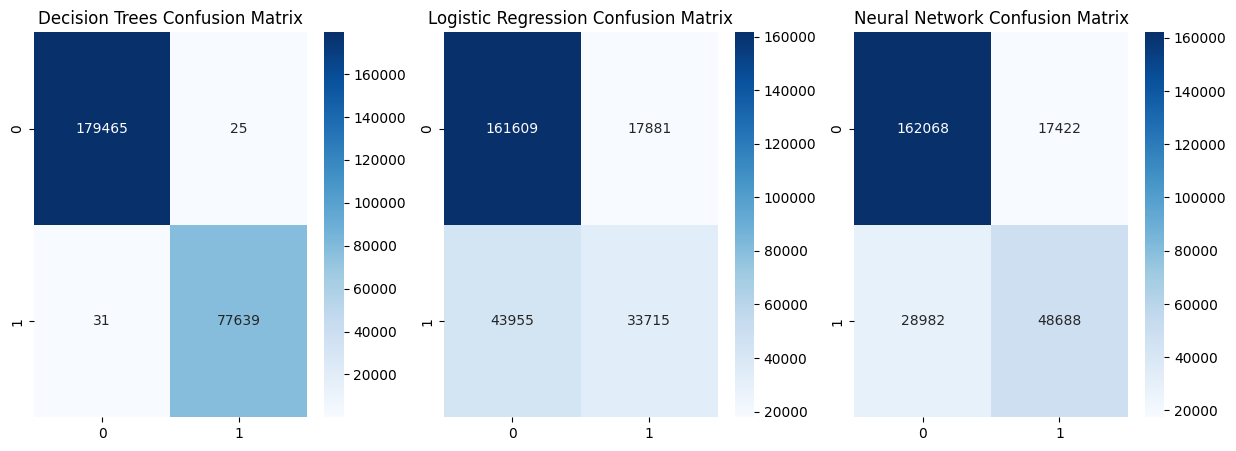

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer



# Merge dataframes
merged_df = pd.merge(users_likes_df, users_df, on='userid')
merged_df = pd.merge(merged_df, likes_df, on='likeid')
# Drop NaN values in the 'political' column
merged_df = merged_df.dropna(subset=['political'])

# Filter only rows where 'political' is 0 or 1
merged_df = merged_df[merged_df['political'].isin([0, 1])]


# Define features (X) and target variable (y)
features = ['age', 'ope', 'con', 'ext', 'agr', 'neu']
target_variable = 'political'


X = merged_df[features]
y = merged_df[target_variable]

# Split the data into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Neural Network (Multi-layer Perceptron)
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)

# Print accuracies
print(f"Decision Trees Accuracy: {dt_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Neural Network Accuracy: {nn_accuracy}")

# Classification Reports
print("Decision Trees Classification Report:")
print(classification_report(y_test, dt_predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

# Confusion Matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Trees Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, nn_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')

plt.show()

For Gender Prediction
Decision Trees Accuracy: 0.9996956370561413
Logistic Regression Accuracy: 0.6592190404934637
Neural Network Accuracy: 0.6721690712595632
Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    409312
           1       1.00      1.00      1.00    651921

    accuracy                           1.00   1061233
   macro avg       1.00      1.00      1.00   1061233
weighted avg       1.00      1.00      1.00   1061233

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.34      0.44    409312
           1       0.68      0.86      0.76    651921

    accuracy                           0.66   1061233
   macro avg       0.64      0.60      0.60   1061233
weighted avg       0.65      0.66      0.63   1061233

Neural Network Classification Report:
              precision    recall  f1-score   support

           0 

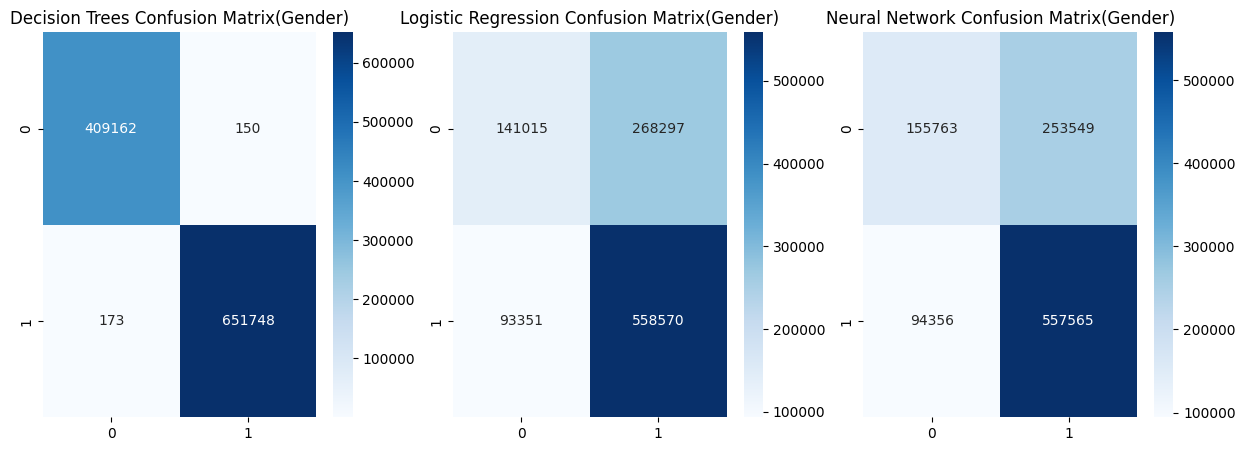

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Merge dataframes
merged_df = pd.merge(users_likes_df, users_df, on='userid')
merged_df = pd.merge(merged_df, likes_df, on='likeid')

# Drop NaN values in the 'gender' column
merged_df = merged_df.dropna(subset=['gender'])

# Filter only rows where 'gender' is 0 or 1
merged_df = merged_df[merged_df['gender'].isin([0, 1])]

# Define features (X) and target variable (y)
features = ['age', 'ope', 'con', 'ext', 'agr', 'neu']
target_variable = 'gender'

X = merged_df[features]
y = merged_df[target_variable]

# Split the data into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Neural Network (Multi-layer Perceptron)
nn_model = MLPClassifier(hidden_layer_sizes=(20,), batch_size=32, max_iter=20, random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)


# Print accuracies
print("For Gender Prediction")
print(f"Decision Trees Accuracy: {dt_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Neural Network Accuracy: {nn_accuracy}")

# Classification Reports
print("Decision Trees Classification Report:")
print(classification_report(y_test, dt_predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

# Confusion Matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Trees Confusion Matrix(Gender)')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix(Gender)')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, nn_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix(Gender)')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Decision Trees Accuracy: 0.9997589049618915
Logistic Regression Accuracy: 0.7586288691864986
Neural Network Accuracy: 0.7658344999222274
Decision Trees Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    179490
         1.0       1.00      1.00      1.00     77670

    accuracy                           1.00    257160
   macro avg       1.00      1.00      1.00    257160
weighted avg       1.00      1.00      1.00    257160

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84    179490
         1.0       0.65      0.43      0.52     77670

    accuracy                           0.76    257160
   macro avg       0.72      0.67      0.68    257160
weighted avg       0.75      0.76      0.74    257160

Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.89  

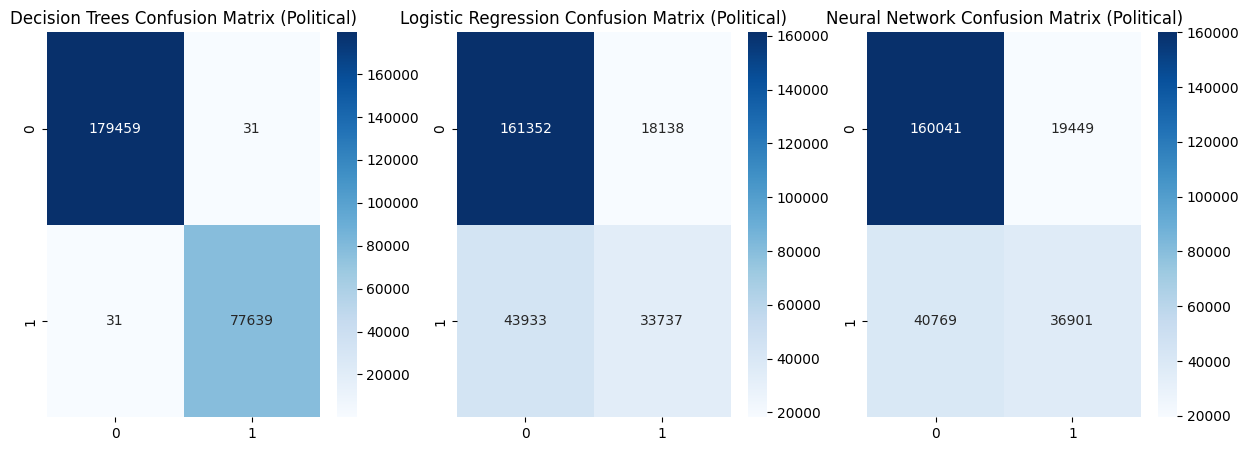

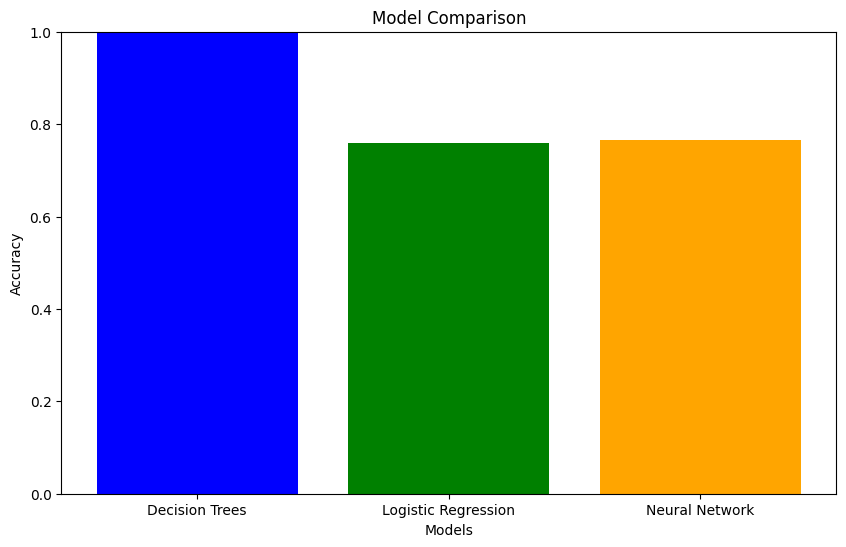

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Merge dataframes
merged_df = pd.merge(users_likes_df, users_df, on='userid')
merged_df = pd.merge(merged_df, likes_df, on='likeid')

# Drop NaN values in the 'political' column
merged_df = merged_df.dropna(subset=['political'])

# Filter only rows where 'political' is 0 or 1
merged_df = merged_df[merged_df['political'].isin([0, 1])]

# Add user likes as a feature
# Assuming you want to count the number of likes per user
user_like_counts = merged_df.groupby('userid')['likeid'].count().reset_index()
user_like_counts.rename(columns={'likeid': 'like_count'}, inplace=True)
merged_df = pd.merge(merged_df, user_like_counts, on='userid', how='left')

# Define features (X) and target variable (y)
features = ['age', 'ope', 'con', 'ext', 'agr', 'neu', 'like_count']
target_variable = 'political'

X = merged_df[features]
y = merged_df[target_variable]

# Split the data into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Neural Network (Multi-layer Perceptron) with adjusted parameters
nn_model = MLPClassifier(hidden_layer_sizes=(20,), batch_size=32, max_iter=20, random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)

# Print accuracies
print(f"Decision Trees Accuracy: {dt_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Neural Network Accuracy: {nn_accuracy}")

# Classification Reports
print("Decision Trees Classification Report:")
print(classification_report(y_test, dt_predictions))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

# Confusion Matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Trees Confusion Matrix (Political)')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix (Political)')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, nn_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix (Political)')

# Accuracy values for each model
accuracies = [dt_accuracy, lr_accuracy, nn_accuracy]
models = ['Decision Trees', 'Logistic Regression', 'Neural Network']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Setting y-axis limits to the range of accuracy values (0 to 1)
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


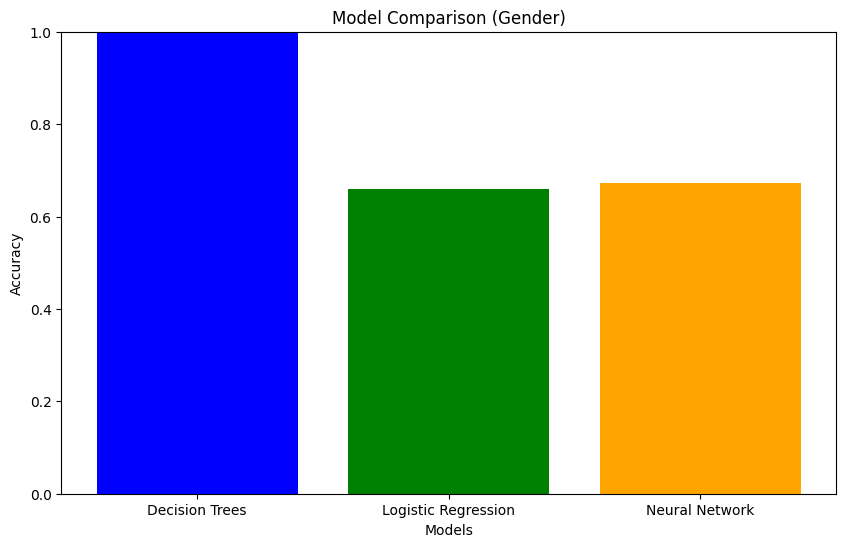

In [6]:
import matplotlib.pyplot as plt

# Accuracy values for each model
accuracies = [dt_accuracy, lr_accuracy, nn_accuracy]
models = ['Decision Trees', 'Logistic Regression', 'Neural Network']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Setting y-axis limits to the range of accuracy values (0 to 1)
plt.title('Model Comparison (Gender)')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()